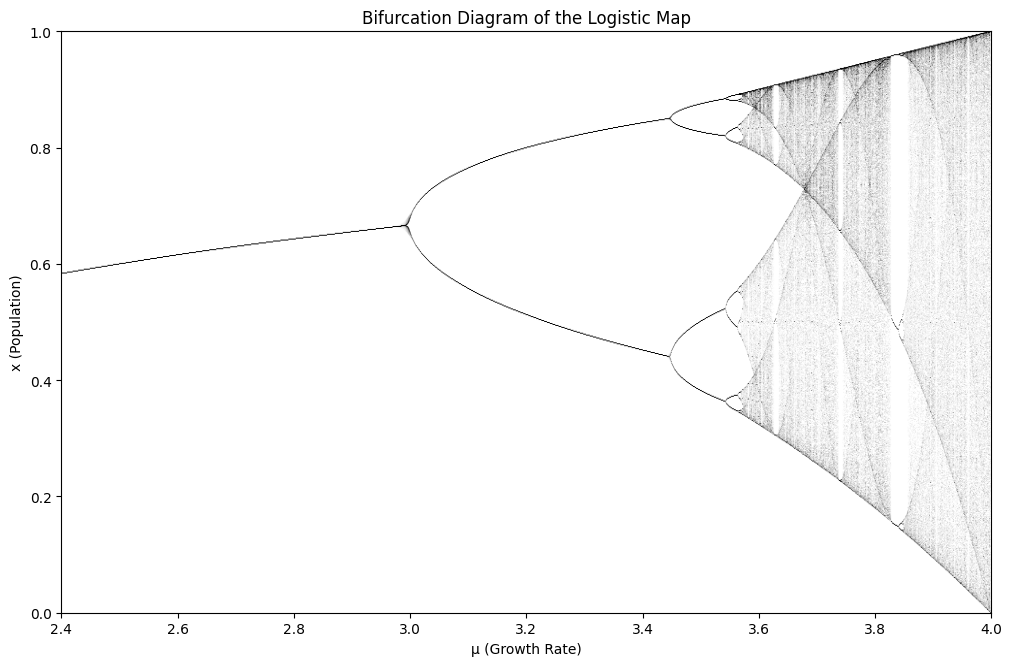

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_graph(data, n_mu, resolution=600, mu_min=2.4, mu_max=4.0, x_min=0, x_max=1):
    if len(data.shape) != 2 or data.shape[0] != n_mu:
        print("Warning: data may be in wrong shape!")

    # Bin the data
    binned_grid = np.zeros((n_mu, resolution))
    for mu_ctr in range(n_mu):
        binned, _ = np.histogram(data[mu_ctr], bins=resolution, range=(0, 1))
        if np.max(binned) > 0:
            binned = binned.astype('float64') / np.max(binned)
        binned_grid[mu_ctr] = binned

    binned_grid = np.transpose(binned_grid)  # Transpose for correct orientation

    # Create graph with a high-contrast colormap
    plt.figure(figsize=(12, 8))
    plt.imshow(binned_grid, origin="lower", extent=[mu_min, mu_max, x_min, x_max], cmap='binary')
    plt.title("Bifurcation Diagram of the Logistic Map")
    plt.xlabel("μ (Growth Rate)")
    plt.ylabel("x (Population)")
    plt.show()

# Increase resolution
n_mu = 2000  # More refined μ values
mu_values = np.linspace(2.4, 4.0, n_mu)

# Store more points per μ to improve clarity
data = np.zeros((n_mu, 500))
for i, mu in enumerate(mu_values):
    x = 0.5

    # Transient iterations
    for _ in range(150):
        x = mu * x * (1 - x)

    # Store more iterations for better detail
    for j in range(500):
        x = mu * x * (1 - x)
        data[i, j] = x

# Generate the bifurcation diagram
create_graph(data, n_mu, resolution=600, mu_min=2.4, mu_max=4.0, x_min=0, x_max=1)
